In [46]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset("titanic")
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [47]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embarked'] = titanic['embarked'].fillna('S')
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')
titanic['deck'] = titanic['deck'].fillna('C')
print(titanic[['age', 'embarked', 'embark_town', 'deck']].value_counts())
titanic.isnull().sum()


age   embarked  embark_town  deck
28.0  S         Southampton  C       105
      Q         Queenstown   C        47
      C         Cherbourg    C        38
24.0  S         Southampton  C        21
22.0  S         Southampton  C        20
                                    ... 
30.0  Q         Queenstown   C         1
30.5  Q         Queenstown   C         1
      S         Southampton  C         1
31.0  C         Cherbourg    C         1
80.0  S         Southampton  A         1
Length: 264, dtype: int64


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

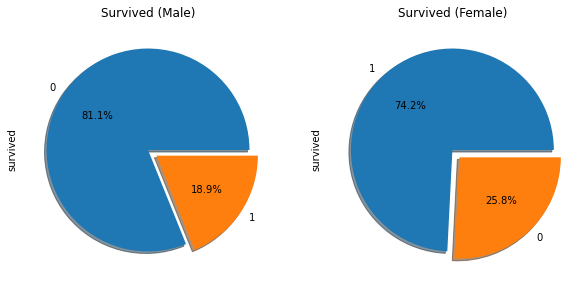

In [48]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(1, 2, figsize=(10,5))
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


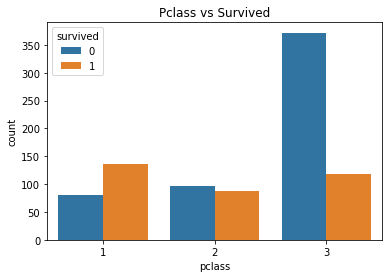

In [49]:
sns.countplot('pclass', hue='survived', data=titanic)
plt.title('Pclass vs Survived')
plt.show()

In [50]:
titanic_corr = titanic.corr(method='pearson')
titanic_corr

survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.064910 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.339898  0.083081  0.018443 -0.549500   
age        -0.064910 -0.339898  1.000000 -0.233296 -0.172482  0.096688   
sibsp      -0.035322  0.083081 -0.233296  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.172482  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096688  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.247704 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.171647 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.247704  0.171647  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000

1차 데이터를 받은것가지고 상관관계랑 회귀분석할건데  
상관관계와 회귀분석 다시 한번 분석해오길  
연구 모형을 그리고 구해온 데이터를 가지고 분석을 한다.  
회귀분석을 한 것을 갖다가 리포팅 할거다  
미션을 낼 것이다  

In [51]:
print(titanic['survived'].corr(titanic['adult_male']))
print(titanic['survived'].corr(titanic['fare']))

0.25730652238496216

ValueError: object arrays are not supported

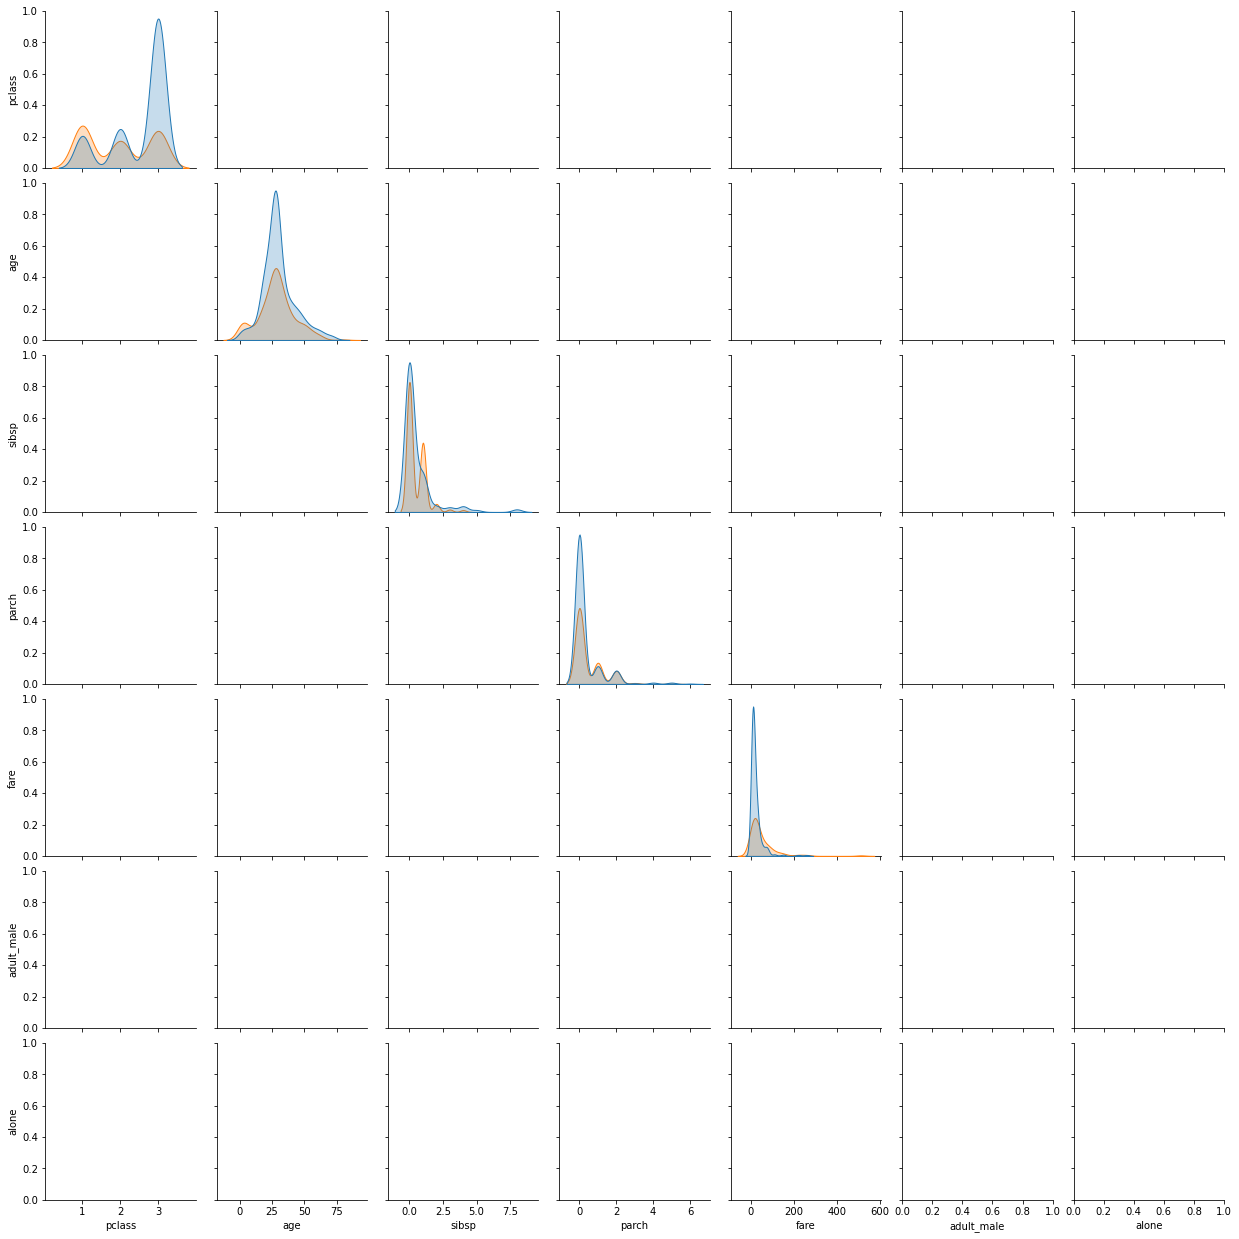

In [52]:
sns.pairplot(titanic, hue='survived')
plt.show()